# Breast Cancer Classification
## 1. Objective
To build a K-Nearest Neighbors (KNN) classifier to predict the binary-valued target variable "Diagnosis" in the Wisconsin breast cancer dataset. Evaluate and report the performance of the classifier.


In [115]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score


  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
df_features_aka_x = breast_cancer_wisconsin_diagnostic.data.features #X
df_targets_aka_y = breast_cancer_wisconsin_diagnostic.data.targets#Y

#create dataframe from x and y
df = pd.DataFrame(df_features_aka_x, columns=df_features_aka_x.columns)
  

## 2. Data Understanding

**Description**:
The Wisconsin breast cancer dataset consists of features extracted from breast cancer biopsies.

You have a dataset consisting of:
- **Features**: `df_features_aka_x`
- **Targets**: `df_targets_aka_y`.  The target variable indicates whether the cancer is malignant (M) or benign (B).



**Variables**:

In [130]:
print(breast_cancer_wisconsin_diagnostic.variables) 

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

**Additional Variable Information**:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

**Summary of the Dataset**:

In [132]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3. Data Preparation

- **Standardization**: Standardize numerical features to ensure each feature contributes equally to distance calculations in KNN.

In [118]:
#standardization/ standardizing the numerical values
X = df_features_aka_x
y = df_targets_aka_y.values.ravel()

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

- **Splitting Data**: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 4. Modeling
- **Model training and evalutation**: Train KNN models with various k values and evaluate their performance based on accuracy, precision, and recall.

In [120]:
# define k:s for experimenting and init lists to store metrics
k_values = list(range(1, 11))
accuracy_list = []
precision_list = []
recall_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append the metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)

## 5. Evaluation
- **Best Model Selection**: Identify the best k based on the highest accuracy and evaluate the performance using a confusion matrix.



In [121]:
# Find the confusion matrix for the best k (maximum accuracy)
best_k = k_values[accuracy_list.index(max(accuracy_list))]

#best knn with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

#create confusion matrix with the best knn 
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Compile the results for reporting
results = pd.DataFrame({
    'k': k_values,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list
})


**Print results**

In [126]:
results

,k,Accuracy,Precision,Recall
0,1,0.953216,0.953173,0.953216
1,2,0.953216,0.954755,0.953216
2,3,0.959064,0.958996,0.959064
3,4,0.964912,0.964954,0.964912
4,5,0.959064,0.958996,0.959064
5,6,0.964912,0.964954,0.964912
6,7,0.959064,0.958996,0.959064
7,8,0.964912,0.964954,0.964912
8,9,0.970760,0.970733,0.970760
9,10,0.959064,0.959270,0.959064


**The best K according to accuracy is**:

In [127]:
best_k

9

**Simple confusion matrix**:

In [128]:
conf_matrix

array([[106,   2],
       [  3,  60]])

**Plotted Confusion Matrix**:

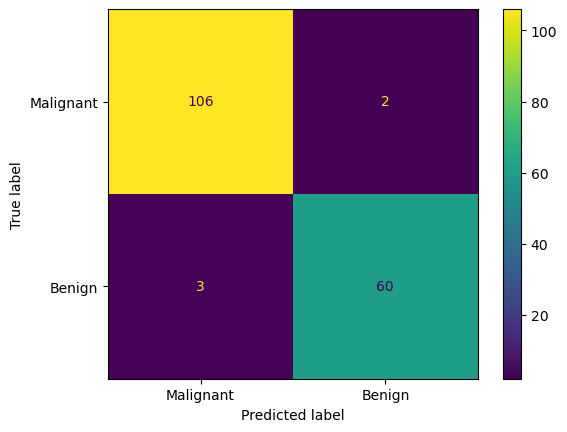

In [133]:
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['Malignant', 'Benign'])
cmd.plot()

**Confusion Matrix Analysis**

The plotted confusion matrix shows the following classification results:

- **Malignant Cases**:
  - 3 out of 109 malignant cases are mistakenly classified as "Benign."

- **Benign Cases**:
  - 2 out of 66 benign cases are mistakenly classified as "Malignant."

Overall, the model performs well, with a relatively low number of misclassifications.
